# Computing with Riemann Surfaces

First, we construct the Riemann surface, $X$, defined by the complex algebraic curve

$$
f(x,y) = y^3 - 2x^3y + x^7.
$$

In [1]:
# import the main Abelfunctions functionality
from abelfunctions import (
    RiemannSurface,
    AbelMap,
    RiemannConstantVector,
    Jacobian,
    puiseux,
    RiemannTheta,
)

# construct a Sage polynomial ring and the above curve
R.<x,y> = QQ[]
f = y**3 - 2*x**3*y + x**7
f = x**2*y**3 - x**4 + 1  # a genus 4 example
#f = x**2*y**3 - x**4 + y
#ftrott = 144*(x**4 + y**4) - 225*(x**2 + y**2) + 350*x**2*y**2 + 81
#f = ftrott
#fdividing = -180*x**5 + 396*y*x**4 - 307*x**3*y**2 + 107*x**2*y**3 + 273*x**3 - 318*x**2*y - 17*x*y**4 + 117*x*y**2 - 68*x + y**5 - 12*y**3 + 19*y   
#f = fdividing

# construct the corresponding Riemann surface
X = RiemannSurface(f)
print X
print X.genus()

Riemann surface defined by f = x^2*y^3 - x^4 + 1
4


In [3]:
X.branch_points

[-1*I, -1, 0, 1, 1*I, +Infinity]

# Demo - Places and Divisors

Computing the places "above" $x=0$ on the underlying curve, $C: f(x,y) = 0$.

$$P(0) = (0, \beta)$$

$x=0$ is a branch point of $f$ so one of these places is "ramified".

In [10]:
b = X.branch_points; b

[-1*I, -1, 0, 1, 1*I, +Infinity]

In [15]:
places = X(0)
for P in places: print P

(-t^3, -t^-2 + O(t^0))


In [18]:
P.puiseux_series.extend(16); P

(-t^3, -t^-2 + 1/3*t^10 + 1/9*t^22 + O(t^31))

In [5]:
# roots of f(0,y)
#
print f(0,y)
print f(0,y).univariate_polynomial().roots()

1
[]


In [6]:
xt = P.puiseux_series.xpart
yt = P.puiseux_series.ypart

print xt
print yt
print
print f(xt,yt)

-t^3
-t^-2

-t^12


In [7]:
P.puiseux_series.extend(20)

xt = P.puiseux_series.xpart
yt = P.puiseux_series.ypart

print xt
print yt
print
print f(xt,yt)

-t^3
-t^-2 + 1/3*t^10 + 1/9*t^22

-5/27*t^36 + 1/81*t^60 + 1/729*t^72


In [6]:
X.branch_points

[-0.836979627962047? - 0.6081012947885316?*I,
 0.3196977699902598? - 0.9839285635706634?*I,
 0,
 1.034563715943573?,
 0.3196977699902598? + 0.9839285635706634?*I,
 -0.836979627962047? + 0.6081012947885316?*I,
 +Infinity]

$x=1$ is not a branch point of $f$, so the places above $x=1$ are completely described by the roots of

$$f(1,y) = 0$$

In [7]:
places = X(1)

for P in places:
    print P

(1, -1.618033988749895?)
(1, 0.618033988749895?)
(1, 1)


We can still request the puiseux series representations at these places.

In [8]:
puiseux(f,1)

[(1 + t, -1.618033988749895? + O(t^2)),
 (1 + t, 0.618033988749895? + O(t^2)),
 (1 + t, 1 + O(t^2))]

In [9]:
for P in puiseux(f,1):
    P.extend(4)
    print P
    print

(1 + t, -1.618033988749895? - 2.854101966249685?*t - 1.416407864998739?*t^2 - 0.2329623574846478?*t^3 + O(t^5))

(1 + t, 0.618033988749895? + 3.854101966249685?*t + 25.41640786499874?*t^2 + 326.2329623574847?*t^3 + O(t^5))

(1 + t, 1 - t - 24*t^2 - 326*t^3 + O(t^5))



Computing the place at $x=\infty$. (In this example there is exactly one.)

In [10]:
P_oo = X('oo')[0]
P_oo.puiseux_series.extend(10)

print P_oo

(-t^-3, t^-7 - 2/3*t^-2 + 8/81*t^8 + O(t^10))


In [11]:
P_oo.puiseux_series.extend(32)

xt = P_oo.puiseux_series.xpart
yt = P_oo.puiseux_series.ypart

print f(xt,yt)

6848512/129140163*t^44 - 13697024/387420489*t^49 - 84377600/3486784401*t^54 - 36700160/10460353203*t^59 + 32505856/3486784401*t^64 + 7170949120/847288609443*t^69 + 1422393344/2541865828329*t^74 - 35296116736/7625597484987*t^79 - 77355548672/22876792454961*t^84 + 50579111936/68630377364883*t^89 + 1566127947776/617673396283947*t^94 + 4462185807872/5559060566555523*t^99 - 24646535610368/16677181699666569*t^104 - 6525867261952/16677181699666569*t^109 + 735684679696384/4052555153018976267*t^114 + 1218230160982016/4052555153018976267*t^119 + 1443770436419584/12157665459056928801*t^124 - 7141661956112384/109418989131512359209*t^129 - 31868431850536960/328256967394537077627*t^134 - 27640347932753920/984770902183611232881*t^139 + 234160972732825600/8862938119652501095929*t^144 + 632538731538022400/26588814358957503287787*t^149 - 14475405587120128000/2153693963075557766310747*t^159


In [12]:
print f(xt,yt).valuation()  ## f(xt,yt) = a*t^{valuation} + higher order terms

44


# Demo - Homology

Computing a canonical basis of cycles on the Riemann surface, $X$.

We can plot their projections into the affine plane.

In [13]:
a = X.a_cycles()
b = X.b_cycles()

print a[0]

Cycle on the Riemann surface defined by f = x^7 - 2*x^3*y + y^3


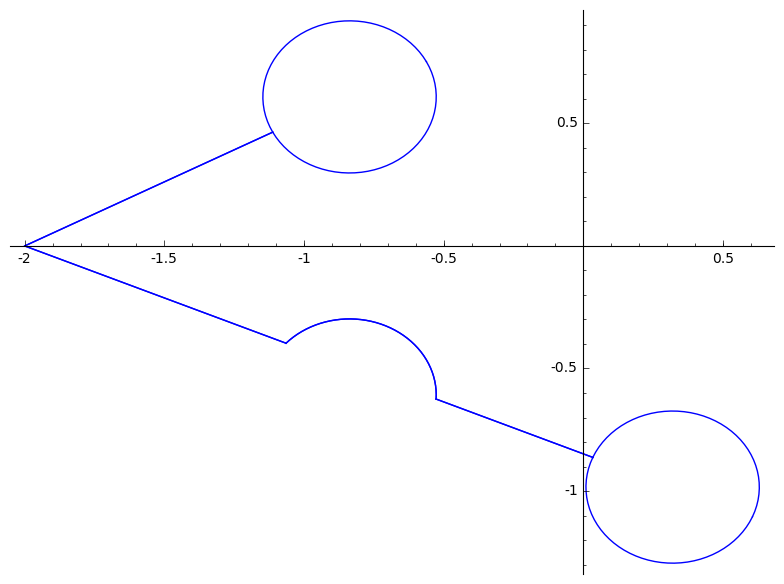

In [14]:
# plot the first a-cycle using 512 equally-spaced points
#
# complex x-projection:
a[0].plot_x(512)

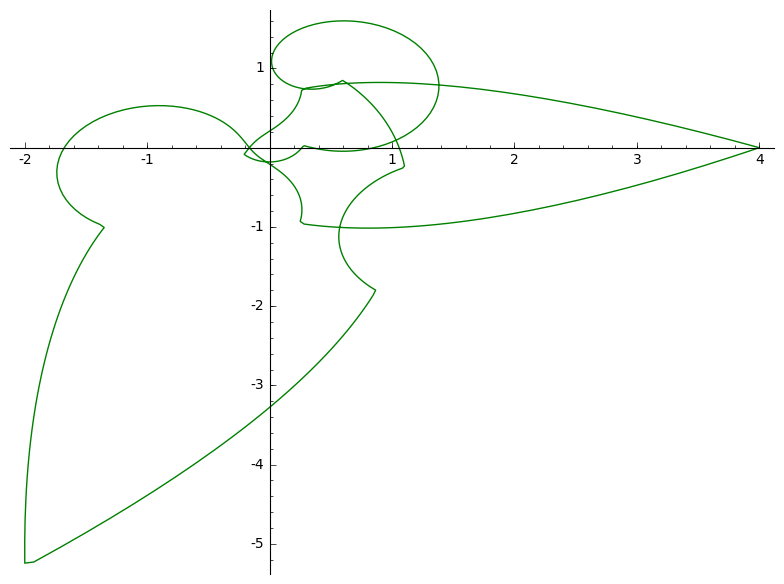

In [15]:
# complex y-projection
#
a[0].plot_y(512, color='green')

In [16]:
print 'x-values:'
print a[0].get_x(0)
print a[0].get_x(1.0)

print 'y-values:'
print a[0].get_y(0)[0]
print a[0].get_y(1.0)[0]

x-values:
(-2+0j)
(-2+0j)
y-values:
(4+0j)
(4+0j)


# Demo - Holomorphic Differentials

In [17]:
omega = X.holomorphic_differentials()
for om in omega:
    print om

x*y/((-2)*x^3 + 3*y^2)
x^3/((-2)*x^3 + 3*y^2)


Compute the places above $x=0$ on $X$ and "localize" the differentials at that place.

One place $P \in X$ above $x=0$ looks like

$$P = \left(t, \frac{t^4}{2} + \frac{t^9}{16} + O(t^{11})\right)$$

In [18]:
# localizing at a place
#
places = X(0)
P = places[0]
P.puiseux_series.extend(8)
print P

(t, 1/2*t^4 + 1/16*t^9 + O(t^11))


In [19]:
omega[0].localize(P)

-1/4*t^2 - 1/8*t^7 + O(t^9)

In [20]:
omega[1].localize(P)

-1/2 - 3/16*t^5 - 15/128*t^10 + O(t^12)

Another place $Q \in X$ above $x=0$ looks like

$$Q = \left(\frac{t^2}{2}, \frac{t^3}{2} + \frac{t^5}{32} + O(t^{12})\right)$$

In [21]:
Q = places[1]
Q.puiseux_series.extend(12)
print Q

(1/2*t^2, 1/2*t^3 - 1/64*t^8 + O(t^12))


In [22]:
omega[0].localize(Q)

1/2 + 1/32*t^5 + O(t^9)

In [23]:
omega[1].localize(Q)

1/4*t + 3/128*t^6 + O(t^10)

Computing the valuation divisors of these differentials:

In [24]:
D1 = omega[0].valuation_divisor()
print D1

/Users/cswiercz/sage/local/lib/python2.7/site-packages/sage/rings/number_field/number_field.py:1526: UserWarning: interpreting PARI polynomial 81 relative to the defining polynomial x^5 - 3 of the PARI number field
  % (x, self.pari_polynomial()))


2(t, 1/2*t^4 + O(t^7))


In [25]:
D2 = omega[1].valuation_divisor()
print D2

(1/2*t^2, 1/2*t^3 + O(t^5)) + (-t^-3, t^-7 + O(t^-5))


**Fact:** If $\mathcal{C}$ is canonical then $\text{deg} \mathcal{C} = 2g - 2$

In [26]:
g = X.genus()
D1.degree == 2*g-2

True

In [27]:
D2.degree == 2*g-2

True

We can plot these differentials along a path $\gamma \subset X$.

For example, the $a$- and $b$-cycles:

In [28]:
#omega[0].plot(a[0])

# Demo - Period Matrices

Integrating each of the holomorphic differentials around each of the a- and b-cycles.

In [29]:
g = X.genus()
tau = X.period_matrix()

A = tau[:,:g]
B = tau[:,g:]

print A
print
print B

[[-1.14309835-0.37141517j -2.99267034+0.97237754j]
 [ 1.15879743-1.59494784j  0.44262123+0.60921586j]]

[[ -1.14309835e+00+0.37141517j  -7.61035679e-12-1.94475508j]
 [  1.15879743e+00+1.59494784j   1.55613300e-11-1.21843173j]]


In [30]:
a[0].integrate(omega[0])

(-1.1430983530319936-0.37141516962068577j)

In [31]:
Omega = X.riemann_matrix()

print Omega

[[-0.29008936+0.70429176j  0.62973191-0.152509j  ]
 [ 0.62973191-0.152509j   -0.41982127+0.4935295j ]]


In [32]:
from numpy.linalg import norm, eigvals

print 'symmetric?    ', norm(Omega - Omega.T)
print 'pos. definite?', eigvals(Omega.imag)

symmetric?     2.28914430387e-12
pos. definite? [ 0.78428641  0.41353486]


# Demo - The Abel Map

Given a fixed *base place* $P_0 \in X$, the Abel Map $A : X \to J(X)$ is defined

$$A(P) = \left( \int_{P_0}^P \omega_1, \ldots, \int_{P_0}^P \omega_g \right)$$

If $\mathcal{D} = \sum_i n_iP_i$ is a *divisor* on $X$ then

$$
A(\mathcal{D}) = \sum_i n_i A(P_i).
$$

In [33]:
# pick two places
P = X(0)[0]
Q = X(I)[0]

# construct a divisor
D = 3*P + Q

In [34]:
X.base_place

((-2+0j), (3.9999999999999996+0j))

In [35]:
J = Jacobian(X)   # reduces vectors modulo lattice ZZ^g + Omega ZZ^g
z1 = AbelMap(P)   # Abel map from P0 to P
z2 = AbelMap(Q)   # Abel map from P0 to Q
z3 = AbelMap(P,Q) # Abel map from P to Q
print z1
print z2
print z3

# numerically verify that A(P,Q) = A(P0,Q) - A(P0,P)
import numpy
print
print numpy.linalg.norm( J((z2-z1) - z3) )

[ 0.55945474+0.41420215j  0.68135842-0.00625734j]
[ 0.22895821-0.00159783j  0.89563133+0.10697438j]
[ 0.37941411+0.28849178j  0.84400481-0.03927729j]

0.0


In [36]:
AbelMap(D)

array([ 1.19741178+0.53671686j,  0.30997469+0.24071137j])

In [37]:
Q

(I, -1.208779665875355? + 1.026155518025695?*I)

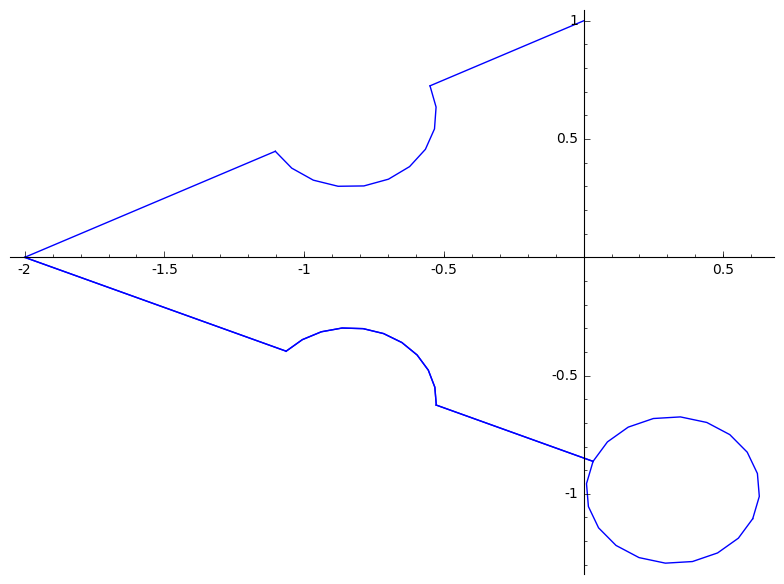

In [38]:
gamma = X.path(Q)
gamma.plot_x()

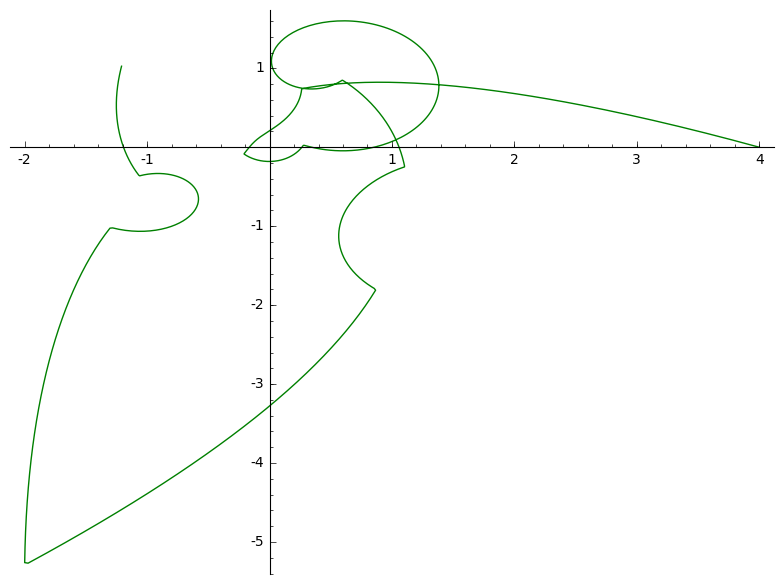

In [39]:
gamma.plot_y(1000, color='green')

## Riemann Constant Vector

The Riemann constant vector satisfies the following two theorems:

**Theorem 1:** $\mathcal{C}$ is a canonical divisor if any only if $K(P_0) \equiv -A(P_0,\mathcal{C})$.

**Theorem 2:** $\theta(W,\Omega) = 0$ if and only if $W = A(P_0,\mathcal{D}) + K(P_0)$ where $\mathcal{D}$ is an effective degree $g-1$ divisor.

We compute $K$ below and verify that these two theorems are satisfied.

In [40]:
K = RiemannConstantVector # alias the RCV function for brevity
P0 = X.base_place
print K(P0)

[ 0.46532185+0.21383511j  0.23846285+0.10051308j]


In [41]:
C = omega[0].valuation_divisor()

In [42]:
J = Jacobian(X)
z = J(2*K(P0) + AbelMap(C))
print z

[ 0.+0.j  0.+0.j]


In [43]:
W = K(P0)
v = RiemannTheta.oscillatory_part(W,Omega)
print abs(v)

1.84851951579e-09


In [44]:
D = X(2)[0]
W = J(AbelMap(D) + K(P0))
v = RiemannTheta.oscillatory_part(W, Omega)
print abs(v)

1.53475525628e-08
